In [ ]:
pwd

In [2]:
import os
import pandas as pd
import mlflow.pyfunc

from sklearn.linear_model import LogisticRegression, SGDClassifier
from sklearn.ensemble import (RandomForestClassifier, AdaBoostClassifier, 
                              GradientBoostingClassifier, BaggingClassifier, ExtraTreesClassifier, 
                              HistGradientBoostingClassifier, StackingClassifier, VotingClassifier)
from sklearn.tree import DecisionTreeClassifier
from xgboost import XGBClassifier
# from catboost import CatBoostClassifier
from sklearn.neighbors import KNeighborsClassifier

from src.config.configuration_manager import ConfigurationManager
from src.components.stage_3_data_split import data_splitting_component
from src.components.stage_4_final_preprocessing import stage_4_final_processing_component
from src.utils import eval_metrics,save_yaml

os.chdir('f:\\iNeuron\\Projects\\scania_failures_2')

os.environ['MLFLOW_TRACKING_URI'] = 'https://dagshub.com/Raj-Narayanan-B/StudentMLProjectRegression.mlflow'
os.environ['MLFLOW_TRACKING_USERNAME'] = 'Raj-Narayanan-B'
os.environ['MLFLOW_TRACKING_PASSWORD'] = '8af4cc66be8aec751397fd525e47ae395fa67442'

mlflow.get_tracking_uri()

'https://dagshub.com/Raj-Narayanan-B/StudentMLProjectRegression.mlflow'

In [3]:
obj = ConfigurationManager()
stage_1_obj = obj.get_stage1_processing_config()
stage_2_obj = obj.get_stage2_processing_config()
data_split_obj = obj.get_data_split_config()
preprocessor_obj = obj.get_preprocessor_config()
model_obj = obj.get_model_config()

data_split_class_obj = data_splitting_component(data_split_conf = data_split_obj,
                                                stage1_processor_conf = stage_1_obj)
stage_4_final_processing_class_obj = stage_4_final_processing_component(data_split_conf = data_split_obj,
                                                                        stage_2_processor_conf = stage_2_obj,
                                                                        preprocessor_conf = preprocessor_obj)

[2024-01-29 11:16:24,739: INFO: utils: config.yaml yaml_file is loaded]
[2024-01-29 11:16:24,747: INFO: utils: params.yaml yaml_file is loaded]
[2024-01-29 11:16:24,757: INFO: utils: schema.yaml yaml_file is loaded]


In [ ]:
# train_data_training_set,train_data_testing_set = data_split_class_obj.data_splitting(None)

In [ ]:
# transformed_train_df, transformed_test_df = stage_4_final_processing_class_obj.final_processing(train_data_training_set,
#                                                                                                 train_data_testing_set)

In [4]:
transformed_train_df = pd.read_csv(stage_4_final_processing_class_obj.stage_2_processor_config.train_data_path)
transformed_test_df = pd.read_csv(stage_4_final_processing_class_obj.stage_2_processor_config.test_data_path)


In [5]:
transformed_train_df.shape

(88332, 171)

In [6]:
transformed_test_df.shape

(29406, 171)

In [7]:
transformed_train_df.isna().sum().unique()

array([0], dtype=int64)

In [8]:
transformed_test_df.isna().sum().unique()

array([0], dtype=int64)

In [9]:
transformed_train_df['class'].value_counts()

class
0    44166
1    44166
Name: count, dtype: int64

In [10]:
transformed_test_df['class'].value_counts()

class
0    14703
1    14703
Name: count, dtype: int64

In [11]:
transformed_train_df.head()

,aa_000,ab_000,ac_000,ad_000,ae_000,af_000,ag_000,ag_001,ag_002,ag_003,...,ee_003,ee_004,ee_005,ee_006,ee_007,ee_008,ee_009,ef_000,eg_000,class
0,-0.642451,0.0,-1.184510e-01,-0.130841,0.0,0.0,0.0,0.0,0.0,0.0,...,-0.513180,-0.473398,-0.472359,-0.341886,-0.246246,-0.028516,0.000000,0.0,0.0,0
1,-0.647499,-0.5,-9.111617e-02,-0.336449,0.0,0.0,0.0,0.0,0.0,0.0,...,-0.516161,-0.478466,-0.477442,-0.343247,-0.247308,-0.028962,0.000000,0.0,0.0,0
2,-0.646405,0.0,-5.466970e-02,-0.205607,0.0,0.0,0.0,0.0,0.0,0.0,...,-0.515376,-0.478164,-0.477356,-0.343320,-0.247344,-0.028962,0.000000,0.0,0.0,0
3,0.221708,0.0,4.894240e-01,1.425234,0.0,0.0,0.0,0.0,0.0,0.0,...,0.657849,0.963839,0.682807,0.064776,-0.110265,-0.007890,0.000000,0.0,0.0,0
4,-0.647204,-0.5,1.386727e+06,-0.345794,0.0,0.0,0.0,0.0,0.0,0.0,...,-0.516105,-0.478462,-0.477416,-0.343079,-0.245686,-0.028962,0.089216,0.0,0.0,0


In [12]:
x_train, y_train = transformed_train_df.drop(columns = 'class'),transformed_train_df['class']
x_test, y_test = transformed_test_df.drop(columns = 'class'),transformed_test_df['class']

##### Load the model

In [ ]:
# mlflow.pyfunc.get_model_dependencies(source)

In [ ]:
# %pip install -r C:\Users\DELL\AppData\Local\Temp\tmpq5rhi43e\challenger_hyperopt_Stacked_Classifier\requirements.txt --user

In [13]:
source = mlflow.search_registered_models(filter_string = f"tags.model_type ilike 'champion'")[0].latest_versions[0].source
run_id = mlflow.search_registered_models(filter_string = f"tags.model_type ilike 'champion'")[0].latest_versions[0].run_id
print(source)
print(run_id)


mlflow-artifacts:/345b8595e5724db381cc615e90ea74ba/eced354105ff46f3b271c1a4c4de547f/artifacts/challenger_hyperopt_Stacked_Classifier
eced354105ff46f3b271c1a4c4de547f


In [14]:
model = mlflow.pyfunc.load_model(model_uri = source)

2024/01/29 11:16:36 WARNING mlflow.pyfunc: The version of Python that the model was saved in, `Python 3.8.10`, differs from the version of Python that is currently running, `Python 3.11.5`, and may be incompatible


In [15]:
params = mlflow.get_run('eced354105ff46f3b271c1a4c4de547f').data.params

In [16]:
params

{'estimators': "[('SGD_Classifier', SGDClassifier()), ('Hist_Grad_Boost_Classifier', HistGradientBoostingClassifier()), ('Bagging_Classifier', BaggingClassifier()), ('Random Forest', RandomForestClassifier()), ('Grad_Boost', GradientBoostingClassifier()), ('Decision_Tree_Classifier', DecisionTreeClassifier())]",
 'final_estimator': 'XGBClassifier()',
 'cv': '5',
 'stack_method': 'predict',
 'passthrough': 'False',
 'XGB_Classifier_Params': "{'objective': 'binary:logistic', 'booster': 'dart', 'importance_type': 'gain', 'learning_rate': 6.415079576032461, 'missing': nan, 'n_estimators': 187, 'tree_method': 'hist'}",
 'SGD_Classifier_Params': "{'alpha': 0.0001, 'average': False, 'early_stopping': False, 'epsilon': 0.1, 'eta0': 0.0, 'fit_intercept': True, 'l1_ratio': 0.15, 'learning_rate': 'optimal', 'loss': 'log_loss', 'max_iter': 1000, 'n_iter_no_change': 5, 'penalty': 'l2', 'power_t': 0.5, 'shuffle': True, 'tol': 0.001, 'validation_fraction': 0.1, 'verbose': 0, 'warm_start': False}",
 '

In [18]:
best_estimators = eval(params['estimators'])
best_estimators

[('SGD_Classifier', SGDClassifier()),
 ('Hist_Grad_Boost_Classifier', HistGradientBoostingClassifier()),
 ('Bagging_Classifier', BaggingClassifier()),
 ('Random Forest', RandomForestClassifier()),
 ('Grad_Boost', GradientBoostingClassifier()),
 ('Decision_Tree_Classifier', DecisionTreeClassifier())]

In [19]:
best_estimators.append(('XGB_Classifier',XGBClassifier()))

In [20]:
for i in range(len(best_estimators)):
    print(best_estimators[i][0])

SGD_Classifier
Hist_Grad_Boost_Classifier
Bagging_Classifier
Random Forest
Grad_Boost
Decision_Tree_Classifier
XGB_Classifier


In [21]:
from pprint import pprint


for i in range(len(best_estimators)):
    print('\n',best_estimators[i][0])
    try:
        params_ = eval(params.get(f"{best_estimators[i][0]}_Params",0))
    except:
        params_ = eval(params.get(f"{best_estimators[i][0]}_Params",0).replace("'missing': nan," , "")) 
    pprint(params_)


 SGD_Classifier
{'alpha': 0.0001,
 'average': False,
 'early_stopping': False,
 'epsilon': 0.1,
 'eta0': 0.0,
 'fit_intercept': True,
 'l1_ratio': 0.15,
 'learning_rate': 'optimal',
 'loss': 'log_loss',
 'max_iter': 1000,
 'n_iter_no_change': 5,
 'penalty': 'l2',
 'power_t': 0.5,
 'shuffle': True,
 'tol': 0.001,
 'validation_fraction': 0.1,
 'verbose': 0,
 'warm_start': False}

 Hist_Grad_Boost_Classifier
{'early_stopping': 'auto',
 'l2_regularization': 0.0,
 'learning_rate': 0.1,
 'loss': 'log_loss',
 'max_bins': 255,
 'max_iter': 392,
 'max_leaf_nodes': 31,
 'min_samples_leaf': 20,
 'n_iter_no_change': 10,
 'scoring': 'loss',
 'tol': 1e-07,
 'validation_fraction': 0.1,
 'verbose': 0,
 'warm_start': False}

 Bagging_Classifier
{'base_estimator': 'deprecated',
 'bootstrap': True,
 'bootstrap_features': False,
 'max_features': 1.0,
 'max_samples': 1.0,
 'n_estimators': 59,
 'oob_score': False,
 'verbose': 0,
 'warm_start': False}

 Random Forest
{'bootstrap': True,
 'ccp_alpha': 0.0,
 

In [22]:
for i in range(len(best_estimators)):
    try:
        best_estimators[i][1].set_params(**eval(params.get(f"{best_estimators[i][0]}_Params",0)))
    except:
        best_estimators[i][1].set_params(**eval(params.get(f"{best_estimators[i][0]}_Params",0).replace("'missing': nan," , "")))
    # print(params.get(f"{best_estimators[i][0]}_Params",0))

In [37]:
n_jobs_params = {'n_jobs':-1}
for i in range(len(best_estimators)):
    try:
        best_estimators[i][1].set_params(**n_jobs_params)
    except: 
        pass

In [38]:
best_estimators

[('SGD_Classifier', SGDClassifier(loss='log_loss', n_jobs=-1)),
 ('Hist_Grad_Boost_Classifier', HistGradientBoostingClassifier(max_iter=392)),
 ('Bagging_Classifier', BaggingClassifier(n_estimators=59, n_jobs=-1)),
 ('Random Forest',
  RandomForestClassifier(class_weight='balanced_subsample', n_estimators=127,
                         n_jobs=-1)),
 ('Grad_Boost',
  GradientBoostingClassifier(criterion='squared_error', loss='exponential',
                             max_features='log2', n_estimators=102)),
 ('Decision_Tree_Classifier',
  DecisionTreeClassifier(criterion='entropy', max_features='sqrt',
                         splitter='random')),
 ('XGB_Classifier',
  XGBClassifier(base_score=None, booster='dart', colsample_bylevel=None,
                colsample_bynode=None, colsample_bytree=None, gamma=None,
                gpu_id=None, importance_type='gain', interaction_constraints=None,
                learning_rate=6.415079576032461, max_delta_step=None,
                max_depth

In [24]:
params['final_estimator'] = eval(params['final_estimator']).set_params(**eval(params.get(f"XGB_Classifier_Params",0).replace("'missing': nan," , "")))

In [39]:
params['final_estimator'].set_params(**n_jobs_params)
params['final_estimator']

XGBClassifier(base_score=None, booster='dart', colsample_bylevel=None,
              colsample_bynode=None, colsample_bytree=None, gamma=None,
              gpu_id=None, importance_type='gain', interaction_constraints=None,
              learning_rate=6.415079576032461, max_delta_step=None,
              max_depth=None, min_child_weight=None, missing=nan,
              monotone_constraints=None, n_estimators=187, n_jobs=-1,
              num_parallel_tree=None, random_state=None, reg_alpha=None,
              reg_lambda=None, scale_pos_weight=None, subsample=None,
              tree_method='hist', validate_parameters=None, verbosity=None)

In [40]:
params

{'estimators': "[('SGD_Classifier', SGDClassifier()), ('Hist_Grad_Boost_Classifier', HistGradientBoostingClassifier()), ('Bagging_Classifier', BaggingClassifier()), ('Random Forest', RandomForestClassifier()), ('Grad_Boost', GradientBoostingClassifier()), ('Decision_Tree_Classifier', DecisionTreeClassifier())]",
 'final_estimator': XGBClassifier(base_score=None, booster='dart', colsample_bylevel=None,
               colsample_bynode=None, colsample_bytree=None, gamma=None,
               gpu_id=None, importance_type='gain', interaction_constraints=None,
               learning_rate=6.415079576032461, max_delta_step=None,
               max_depth=None, min_child_weight=None, missing=nan,
               monotone_constraints=None, n_estimators=187, n_jobs=-1,
               num_parallel_tree=None, random_state=None, reg_alpha=None,
               reg_lambda=None, scale_pos_weight=None, subsample=None,
               tree_method='hist', validate_parameters=None, verbosity=None),
 'cv': '5'

In [41]:
best_estimators

[('SGD_Classifier', SGDClassifier(loss='log_loss', n_jobs=-1)),
 ('Hist_Grad_Boost_Classifier', HistGradientBoostingClassifier(max_iter=392)),
 ('Bagging_Classifier', BaggingClassifier(n_estimators=59, n_jobs=-1)),
 ('Random Forest',
  RandomForestClassifier(class_weight='balanced_subsample', n_estimators=127,
                         n_jobs=-1)),
 ('Grad_Boost',
  GradientBoostingClassifier(criterion='squared_error', loss='exponential',
                             max_features='log2', n_estimators=102)),
 ('Decision_Tree_Classifier',
  DecisionTreeClassifier(criterion='entropy', max_features='sqrt',
                         splitter='random')),
 ('XGB_Classifier',
  XGBClassifier(base_score=None, booster='dart', colsample_bylevel=None,
                colsample_bynode=None, colsample_bytree=None, gamma=None,
                gpu_id=None, importance_type='gain', interaction_constraints=None,
                learning_rate=6.415079576032461, max_delta_step=None,
                max_depth

In [42]:
params['final_estimator']

XGBClassifier(base_score=None, booster='dart', colsample_bylevel=None,
              colsample_bynode=None, colsample_bytree=None, gamma=None,
              gpu_id=None, importance_type='gain', interaction_constraints=None,
              learning_rate=6.415079576032461, max_delta_step=None,
              max_depth=None, min_child_weight=None, missing=nan,
              monotone_constraints=None, n_estimators=187, n_jobs=-1,
              num_parallel_tree=None, random_state=None, reg_alpha=None,
              reg_lambda=None, scale_pos_weight=None, subsample=None,
              tree_method='hist', validate_parameters=None, verbosity=None)

In [43]:
stacking_clf = StackingClassifier(estimators=best_estimators,
                                  final_estimator=params['final_estimator'],
                                  cv = eval(params['cv']),
                                  stack_method = params['stack_method'],
                                  passthrough = eval(params['passthrough']),
                                  n_jobs= -1,
                                  verbose = 3)
stacking_clf

StackingClassifier(cv=5,
                   estimators=[('SGD_Classifier',
                                SGDClassifier(loss='log_loss', n_jobs=-1)),
                               ('Hist_Grad_Boost_Classifier',
                                HistGradientBoostingClassifier(max_iter=392)),
                               ('Bagging_Classifier',
                                BaggingClassifier(n_estimators=59, n_jobs=-1)),
                               ('Random Forest',
                                RandomForestClassifier(class_weight='balanced_subsample',
                                                       n_estimators=127,
                                                       n_jobs=-1)),
                               ('Grad_B...
                                                 learning_rate=6.415079576032461,
                                                 max_delta_step=None,
                                                 max_depth=None,
                                                 min_child_weight=None,
                                                 missing=nan,
                                                 monotone_constraints=None,
                                                 n_estimators=187, n_jobs=-1,
                                                 num_parallel_tree=None,
                                                 random_state=None,
                                                 reg_alpha=None,
                                                 reg_lambda=None,
                                                 scale_pos_weight=None,
                                                 subsample=None,
                                                 tree_method='hist',
                                                 validate_parameters=None,
                                                 verbosity=None),
                   n_jobs=-1, stack_method='predict', verbose=3)

In [28]:
x_train.shape

(88332, 170)

In [29]:
x_train.isna().sum().unique()

array([0], dtype=int64)

In [30]:
y_train.value_counts()

class
0    44166
1    44166
Name: count, dtype: int64

In [44]:
stacking_clf.fit(x_train,y_train)
y_pred = stacking_clf.predict(x_test)

In [45]:
y_pred = model.predict(x_test)
eval_metrics(y_true = y_test, 
             y_pred = y_pred)

{'Balanced_Accuracy_Score': 0.5,
 'F1_Score': 0.6666666666666666,
 'Accuracy_Score': 0.5,
 'Cost': 147030.0}

In [65]:
tn, fp, fn, tp = confusion_matrix(y_true=y_test, y_pred=y_pred).ravel()
print(tn, fp, fn, tp)

0 14703 0 14703


In [49]:
rf = RandomForestClassifier(n_estimators=123,
                            max_features='sqrt',
                            criterion='entropy',
                            class_weight='balanced_subsample',
                            n_jobs=-1)
rf

RandomForestClassifier(class_weight='balanced_subsample', criterion='entropy',
                       n_estimators=123, n_jobs=-1)

In [50]:
rf.fit(x_train,y_train)

RandomForestClassifier(class_weight='balanced_subsample', criterion='entropy',
                       n_estimators=123, n_jobs=-1)

In [52]:
y_pred_ = rf.predict(x_test)

In [59]:
from matplotlib import pyplot as plt
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay


cf= confusion_matrix(y_true = y_test, 
             y_pred = y_pred_)

plt.figure(figsize=(5,5))
ConfusionMatrixDisplay(cf)
plt.show()

<Figure size 500x500 with 0 Axes>

<Figure size 500x500 with 0 Axes>

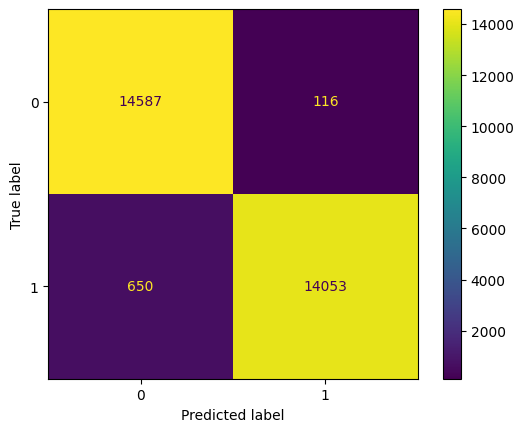

In [60]:
from matplotlib import pyplot as plt
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay

# Assuming you have y_test and y_pred_ defined

cf = confusion_matrix(y_true=y_test, y_pred=y_pred_)

plt.figure(figsize=(5, 5))

# Instantiate ConfusionMatrixDisplay
cmd = ConfusionMatrixDisplay(confusion_matrix=cf, display_labels=None)

# Plot the confusion matrix
cmd.plot()

plt.show()


In [61]:
tn, fp, fn, tp = confusion_matrix(y_true=y_test, y_pred=y_pred_).ravel()
print(tn, fp, fn, tp)
# cost_ = float((10*fp)+(500*fn))

14587 116 650 14053


In [63]:
(10*116)+(650*500)

326160

In [53]:
eval_metrics(y_true = y_test, 
             y_pred = y_pred_)

{'Balanced_Accuracy_Score': 0.9739508943752975,
 'F1_Score': 0.9734691050152398,
 'Accuracy_Score': 0.9739508943752976,
 'Cost': 326160.0}

In [ ]:
train_data_training_set_, train_data_testing_set_ = data_split_class_obj.data_splitting(1500)
transformed_train_df_, transformed_test_df_ = stage_4_final_processing_class_obj.final_processing(train_data_training_set_,
                                                                                                train_data_testing_set_)
x_train_, y_train_ = transformed_train_df_.drop(columns = 'class'),transformed_train_df_['class']
x_test_, y_test_ = transformed_test_df_.drop(columns = 'class'),transformed_test_df_['class']

In [ ]:
y_pred_ = model.predict(x_test_)
eval_metrics(y_true = y_test_, 
             y_pred = y_pred_)

In [ ]:
model.metadata.run_id

In [ ]:
mlflow.pyfunc.load_model(f"file:artifacts/model/hp_tuned_model/{model.metadata.artifact_path}")

In [ ]:
import os

def get_most_recent_subdirectory(parent_directory):
    # Get a list of all subdirectories in the parent directory
    subdirectories = [d for d in os.listdir(parent_directory) if os.path.isdir(os.path.join(parent_directory, d))]

    # If there are no subdirectories, return None
    if not subdirectories:
        return None

    # Sort the subdirectories by modification time (most recent first)
    subdirectories.sort(key=lambda d: os.path.getmtime(os.path.join(parent_directory, d)), reverse=True)

    # Return the most recent subdirectory
    return os.path.join(parent_directory, subdirectories[0])

# Example usage:
parent_directory = "artifacts/model/hp_tuned_model/"
most_recent_subdirectory = get_most_recent_subdirectory(parent_directory)

if most_recent_subdirectory:
    print(f"The most recent subdirectory is: {most_recent_subdirectory}")
else:
    print("No subdirectories found.")


In [ ]:
model_obj.root_dir

In [ ]:
model.metadata.artifact_path

In [ ]:
from pathlib import Path


os.chdir(f"F:\iNeuron\Projects\scania_failures_2\\artifacts\model")
save_yaml(file = model.metadata.artifact_path, filepath = Path(f"{model_obj.root_dir}"))

In [ ]:
pwd